Generated Directed Graph:
[(1, 2), (1, 5), (1, 4), (2, 1), (2, 4), (3, 4), (4, 3), (4, 2), (5, 3)]
Maximum number of edges that can be removed while keeping the graph connected: 4


C:\Users\DiogoKeeper12\AppData\Local\Temp\ipykernel_14212\2530631786.py:16: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors = random.sample(possible_neighbors, min(num_neighbors, len(possible_neighbors)))  # Avoid duplicates


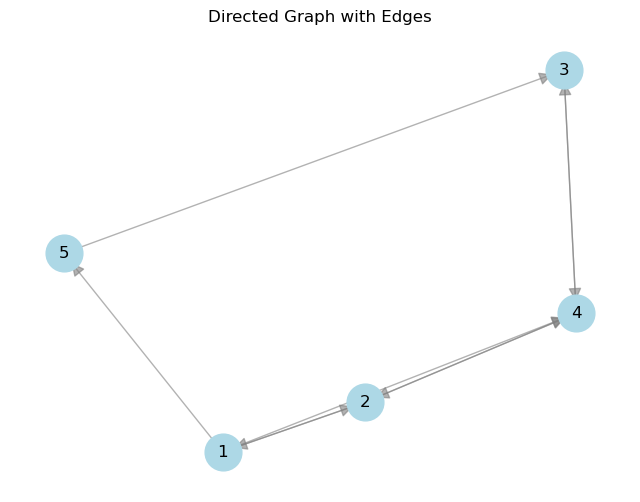

In [12]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Step 1: Generate a random directed graph
def generate_random_digraph(N):
    while True:
        G = nx.DiGraph()
        G.add_nodes_from(range(1, N + 1))

        # Create edges for each node
        for node in G.nodes():
            # Randomly choose between 1 to 3 neighbors
            num_neighbors = random.randint(1, 3)
            possible_neighbors = set(G.nodes()) - {node}  # Avoid self-loops
            neighbors = random.sample(possible_neighbors, min(num_neighbors, len(possible_neighbors)))  # Avoid duplicates
            for neighbor in neighbors:
                G.add_edge(node, neighbor)  # Add the directed edge

        # Check if the generated graph is strongly connected
        if nx.is_strongly_connected(G):
            return G

# Step 2: Check if the graph remains strongly connected after edge removals
def is_strongly_connected_after_removal(G, edges_to_remove):
    H = G.copy()
    H.remove_edges_from(edges_to_remove)
    return nx.is_strongly_connected(H)

# Step 3: Find the maximum number of edges that can be removed while keeping the graph strongly connected
def max_edge_removal(G):
    total_edges = len(G.edges())
    edges = list(G.edges())
    removable_count = 0

    for edge in edges:
        # Try removing this edge
        if is_strongly_connected_after_removal(G, [edge]):
            removable_count += 1
        else:
            # If removing the edge makes it not strongly connected, do not count it
            continue

    # The maximum number of edges that can be removed is counted
    return removable_count

# Main code
N = random.randint(1, 6)  # Number of nodes between 6 and 10
G = generate_random_digraph(N)

# Output the graph
print("Generated Directed Graph:")
print(G.edges())

# Find the maximum number of edges that can be removed while keeping the graph strongly connected
max_removal = max_edge_removal(G)
print(f"Maximum number of edges that can be removed while keeping the graph connected: {max_removal}")

# Step 4: Visualize the graph with visible edges
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Position nodes using a layout algorithm

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', alpha=0.6)

# Draw nodes with visible attributes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)  
# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title("Directed Graph with Edges")
plt.axis('off')  # Hide the axes
plt.show()


C:\Users\DiogoKeeper12\AppData\Local\Temp\ipykernel_13264\2544568826.py:23: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  team = random.sample(Colabs, 6)


    Projeto  Sala  Dia  Slot            Participantes
0         0     0    1     2          [23, 27, 14, 8]
1         0     0    4     2         [23, 15, 14, 24]
2         1     0    2     5          [25, 19, 18, 7]
3         1     0    3     5         [25, 19, 18, 28]
4         1     0    4     5          [25, 19, 7, 28]
5         1     1    2     1           [25, 9, 18, 7]
6         2     0    0     1       [2, 12, 10, 4, 20]
7         2     0    2     4            [2, 10, 4, 5]
8         2     0    3     7           [2, 12, 5, 20]
9         2     0    4     3           [2, 10, 4, 20]
10        2     1    4     5           [2, 12, 10, 5]
11        3     0    3     1           [1, 26, 6, 16]
12        3     0    3     3            [1, 3, 6, 13]
13        4     0    1     0          [29, 0, 17, 21]
14        4     0    1     6          [29, 11, 0, 22]
15        4     0    1     7      [29, 11, 0, 22, 21]
16        4     0    2     1  [29, 11, 0, 22, 17, 21]
17        4     1    3     5